<a href="https://colab.research.google.com/github/Ummepinki/Facial-Expressions-Recognition-from-image-using-Convolution-Neural-Network/blob/main/FINAL__CK%2B48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pickle

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

drive_path1='/content/drive/My Drive/Dataset1/CK+48X.pickle'
drive_path2='/content/drive/My Drive/Dataset1/CK+48Y.pickle'

X=pickle.loads(open(drive_path1,"rb").read())
Y=pickle.loads(open(drive_path2,"rb").read())

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,shuffle=True)

# Shape

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(784, 48, 48, 3)
(784, 7)
(197, 48, 48, 3)
(197, 7)


# Parameter

In [ ]:
Classes=7
H=48
W=48
depth=3

# Labels

In [ ]:
emotions=["anger","contempt","disgust","fear","happy","sadness","surprise"]

# Print Image

labels: disgust


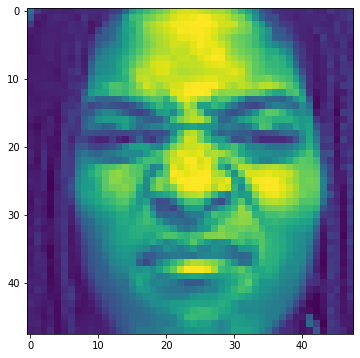

In [ ]:
import numpy as np
class_idx=2
n=1
indices=np.where(y_test[:,class_idx]==1.)[0]

idx=indices[n]

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(18,6)

plt.imshow(X_test[idx][...,0])

print('labels:',emotions[class_idx])

# Sample Images

In [ ]:
def plot_images(images,cls_true,cls_pred=None):
  assert len(images)==len(cls_true)==16

  fig,axes=plt.subplots(4,4)
  fig.subplots_adjust(hspace=0.3,wspace=0.4)

  for i,ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap='binary')

    if cls_pred is None:
      xlabel="True:{0}".format(emotions[cls_true[i].argmax()])
    else:
        xlabel="True:{0},Pred:{1}".format(cls_true[i],emotions[cls_pred[i].argmax()])
    ax.set_xlabel(xlabel)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

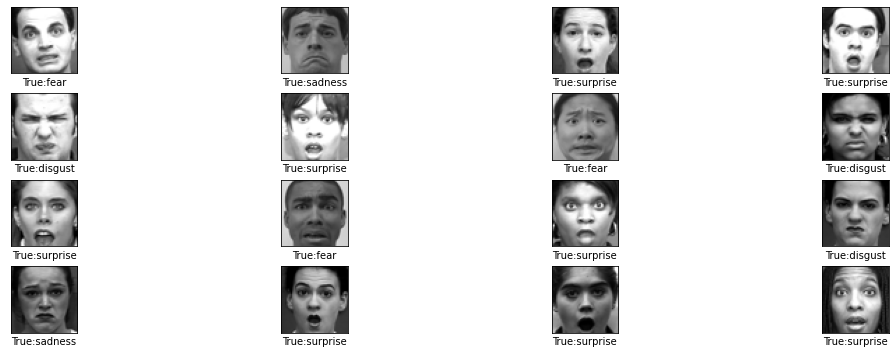

In [ ]:
images=X_train[10:26]
cls_true=y_train[10:26]
plot_images(images=images,cls_true=cls_true)

# Load Package

In [ ]:
from keras.callbacks import CSVLogger,ModelCheckpoint,EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Activation,Convolution2D,Dropout,Conv2D
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from sklearn.metrics import classification_report
from keras import layers
from keras.regularizers import l2
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
import os
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.preprocessing import image
import keras
import tensorflow as tf

# Initialization

In [ ]:
batch_size=8
num_epochs=30
depth=depth
INITI_LR=0.0005
verbose=1
num_classes=Classes

# Proposed Model

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3, 3),activation='relu',strides=(1,1), input_shape=(H,W,depth)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.10))

model.add(Conv2D(64,(3, 3),activation='relu',strides=(1,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.10))

model.add(Dense(Classes, activation='softmax'))

In [ ]:
opt = SGD(lr=INITI_LR, decay=INITI_LR /num_epochs , momentum=0.9)
 #model = MiniVGGNet(width=H, height=W, depth=depth, classes=Classes)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
history=model_call=model.fit(X_train,y_train,batch_size,
                       epochs=num_epochs,verbose=1,
                       validation_data=(X_test,y_test))

Epoch 1/30
98/98 [==============================] - 14s 144ms/step - loss: 1.8538 - accuracy: 0.4605 - val_loss: 3.5052 - val_accuracy: 0.0761
Epoch 2/30
98/98 [==============================] - 14s 140ms/step - loss: 0.9767 - accuracy: 0.6735 - val_loss: 3.7804 - val_accuracy: 0.0761
Epoch 3/30
98/98 [==============================] - 14s 141ms/step - loss: 0.6713 - accuracy: 0.7730 - val_loss: 2.6184 - val_accuracy: 0.1827
Epoch 4/30
98/98 [==============================] - 14s 140ms/step - loss: 0.4895 - accuracy: 0.8444 - val_loss: 0.7827 - val_accuracy: 0.6853
Epoch 5/30
98/98 [==============================] - 14s 142ms/step - loss: 0.4215 - accuracy: 0.8622 - val_loss: 0.2996 - val_accuracy: 0.9036
Epoch 6/30
98/98 [==============================] - 14s 141ms/step - loss: 0.3255 - accuracy: 0.8814 - val_loss: 0.1911 - val_accuracy: 0.9492
Epoch 7/30
98/98 [==============================] - 14s 142ms/step - loss: 0.2729 - accuracy: 0.9082 - val_loss: 0.1554 - val_accuracy: 0.9442

# Classification Report

In [ ]:
predictions = model.predict(X_test, batch_size=64)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=emotions))

              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        22
    contempt       1.00      0.93      0.97        15
     disgust       1.00      1.00      1.00        41
        fear       1.00      1.00      1.00        16
       happy       1.00      1.00      1.00        42
     sadness       0.94      1.00      0.97        15
    surprise       1.00      1.00      1.00        46

    accuracy                           0.99       197
   macro avg       0.99      0.99      0.99       197
weighted avg       1.00      0.99      0.99       197



# Curve

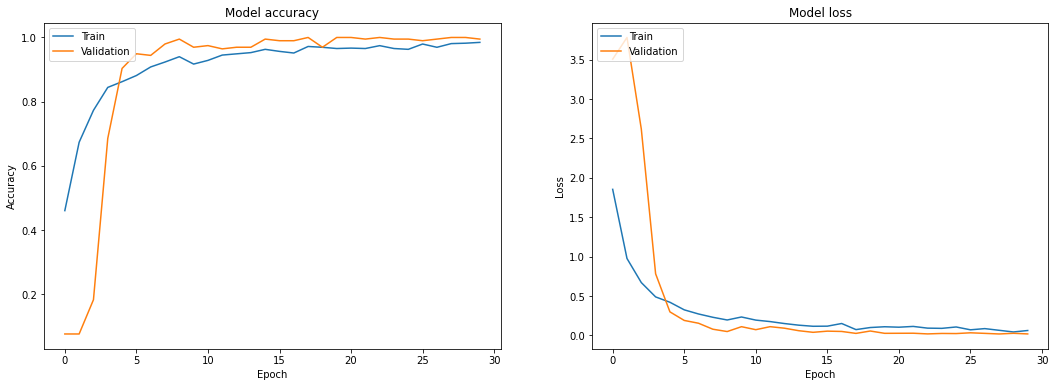

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm,
                  target_names,
                  title='Confusion matrix',
                  cmap=None,
                  normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # bicubic
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    #bottom, top = plt.get_ylim()
    #plt.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

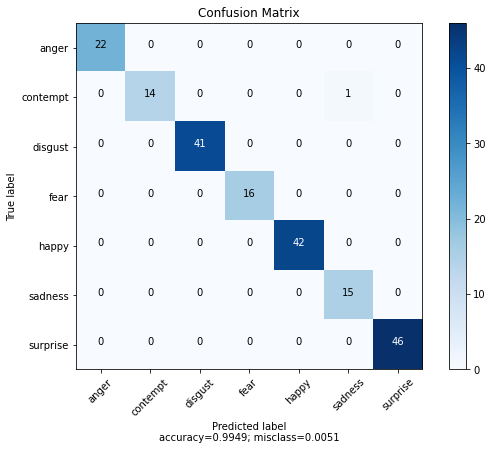

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test, batch_size=64)
testY_F = y_test.argmax(axis=1)
prediction_F = predictions.argmax(axis=1)

cm = confusion_matrix(testY_F, prediction_F)
plot_confusion_matrix(cm           = np.array(cm), 
                      normalize    = False,
                      target_names = emotions,
                      title        = "Confusion Matrix")

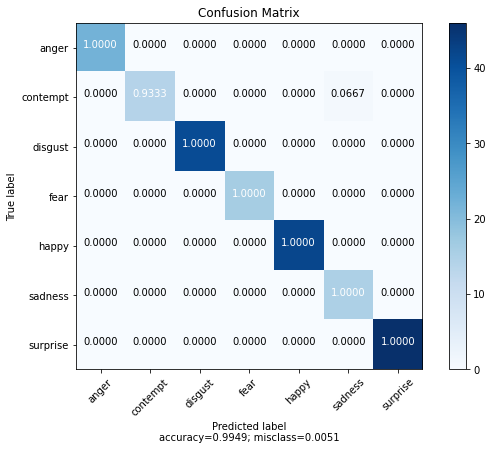

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test, batch_size=64)
testY_F = y_test.argmax(axis=1)
prediction_F = predictions.argmax(axis=1)

cm = confusion_matrix(testY_F, prediction_F)
plot_confusion_matrix(cm           = np.array(cm), 
                      normalize    = True,
                      target_names = emotions,
                      title        = "Confusion Matrix")

# Save Model

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('/content/drive/My Drive/Colab Notebooks/cnn.h5')

# Load Model

In [ ]:
from keras.models import load_model
model_base_path1="/content/drive/My Drive/Colab Notebooks/cnn.h5"
H=model=load_model(model_base_path1)

# MiniVGGNet

In [ ]:
def MiniVGGNet(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format()=="channels_first":
        inputShape = (depth, height, width)
        chanDim = 1
    model.add(Conv2D(32, (3,3), padding = "same", input_shape = inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32, (3,3), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3,3), padding = "same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(classes))
    model.add(Activation("softmax"))
    return model

In [ ]:
opt = SGD(lr=INITI_LR, decay=INITI_LR /num_epochs , momentum=0.9)
model = MiniVGGNet(width=H, height=W, depth=depth, classes=Classes)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
history=model_call=model.fit(X_train,y_train,batch_size,
                       epochs=num_epochs,verbose=1,
                       validation_data=(X_test,y_test))

Epoch 1/30
98/98 [==============================] - 14s 142ms/step - loss: 1.9396 - accuracy: 0.4043 - val_loss: 2.8533 - val_accuracy: 0.1320
Epoch 2/30
98/98 [==============================] - 14s 142ms/step - loss: 0.9929 - accuracy: 0.6773 - val_loss: 3.2390 - val_accuracy: 0.1015
Epoch 3/30
98/98 [==============================] - 14s 142ms/step - loss: 0.6716 - accuracy: 0.7742 - val_loss: 1.8748 - val_accuracy: 0.2792
Epoch 4/30
98/98 [==============================] - 14s 142ms/step - loss: 0.5570 - accuracy: 0.8214 - val_loss: 1.0695 - val_accuracy: 0.5635
Epoch 5/30
98/98 [==============================] - 14s 143ms/step - loss: 0.4342 - accuracy: 0.8533 - val_loss: 0.8968 - val_accuracy: 0.7107
Epoch 6/30
98/98 [==============================] - 14s 143ms/step - loss: 0.3350 - accuracy: 0.8839 - val_loss: 0.2996 - val_accuracy: 0.8782
Epoch 7/30
98/98 [==============================] - 14s 143ms/step - loss: 0.2371 - accuracy: 0.9273 - val_loss: 0.1833 - val_accuracy: 0.9391

# Classification Report

In [ ]:
predictions = model.predict(X_test, batch_size=64)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=emotions))

              precision    recall  f1-score   support

       anger       1.00      0.89      0.94        27
    contempt       0.82      1.00      0.90        14
     disgust       1.00      1.00      1.00        31
        fear       1.00      1.00      1.00        11
       happy       1.00      1.00      1.00        49
     sadness       1.00      1.00      1.00        17
    surprise       1.00      1.00      1.00        48

    accuracy                           0.98       197
   macro avg       0.97      0.98      0.98       197
weighted avg       0.99      0.98      0.99       197



# Curve

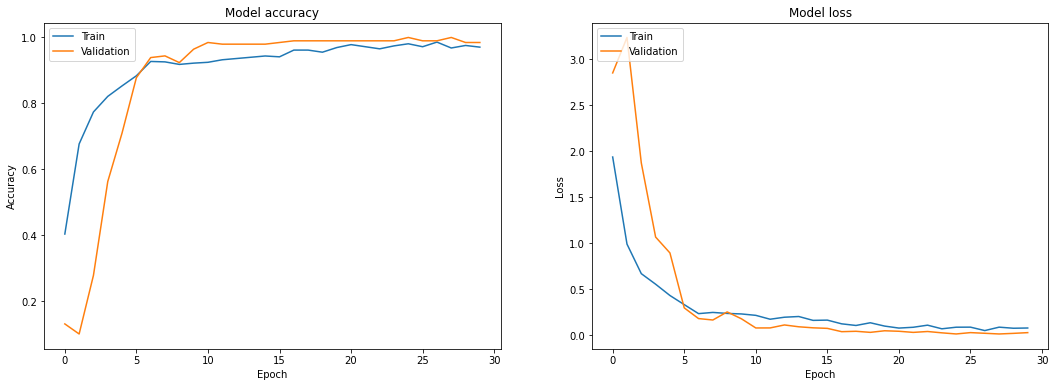

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm,
                  target_names,
                  title='Confusion matrix',
                  cmap=None,
                  normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # bicubic
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    #bottom, top = plt.get_ylim()
    #plt.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

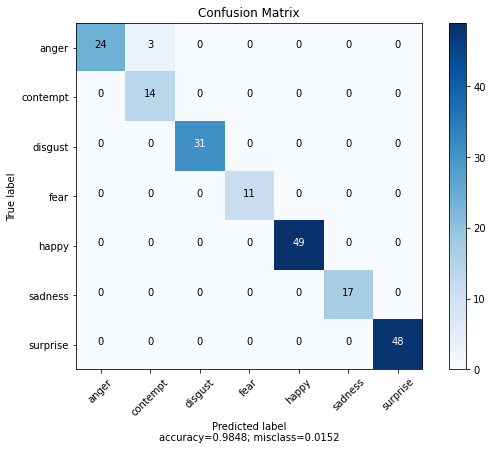

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test, batch_size=64)
testY_F = y_test.argmax(axis=1)
prediction_F = predictions.argmax(axis=1)

cm = confusion_matrix(testY_F, prediction_F)
plot_confusion_matrix(cm           = np.array(cm), 
                      normalize    = False,
                      target_names = emotions,
                      title        = "Confusion Matrix")

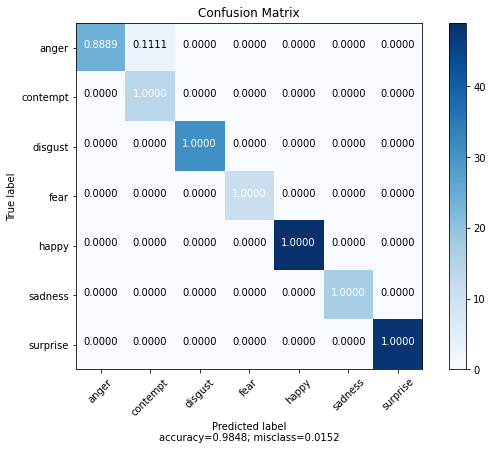

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test, batch_size=64)
testY_F = y_test.argmax(axis=1)
prediction_F = predictions.argmax(axis=1)

cm = confusion_matrix(testY_F, prediction_F)
plot_confusion_matrix(cm           = np.array(cm), 
                      normalize    = True,
                      target_names = emotions,
                      title        = "Confusion Matrix")

# Save Model

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('/content/drive/My Drive/Colab Notebooks/salma.h5')

# Load Model

In [ ]:
from keras.models import load_model
model_base_path1="/content/drive/My Drive/Colab Notebooks/salma.h5"
H=model=load_model(model_base_path1)